In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# plyaer data load 및 정리(프로필)
player_df = pd.read_csv('../data/new/players_all.csv')
player_df = player_df.drop('Unnamed: 0', axis=1)

In [4]:
# 1xbet data load 및 정리(스텟)
xbet_df = pd.read_csv('../data/new/1xbet_all.csv')
xbet_df = xbet_df.drop(['Team','Age','Position'], axis=1).rename(columns={'Drb_x':'Drb_Off', 'Drb_y':'Drb_Def'})

In [5]:
# understat data load 및 정리(스텟)
understat_df = pd.read_csv('../data/new/understat_all.csv')
understat_df = understat_df.drop(['No','Team'], axis=1)

In [6]:
# capology load(연봉)
capology_df = pd.read_csv('../data/new/capology_all.csv')

In [7]:
# 프로필 + 연봉
eda_df = player_df.merge(capology_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')] # 중복 제거

In [8]:
# 프로필 + 연봉 + 스텟(understat)
eda_df = eda_df.merge(understat_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])

In [9]:
# 프로필 + 연봉 + 스텟(understat) + 스텟(1xbet)
eda_df = eda_df.merge(
    xbet_df[[
        'Name', 'year', 'SpG', 'KeyP', 'Drb_Off', 'Fouled', 'Off',
        'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter','Fouls',
        'Offsides', 'Clear', 'Drb_Def', 'Blocks', 'AvgP', 'PS%']],
    how='left',
    left_on=['Name', 'year'],
    right_on=['Name', 'year']
)

In [10]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Id      4756 non-null   int64  
 1   Name           4756 non-null   object 
 2   Birth Year     4756 non-null   int64  
 3   Age            4756 non-null   int64  
 4   Team           4756 non-null   object 
 5   Position       4756 non-null   object 
 6   year           4756 non-null   int64  
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
 10  Apps           4744 non-null   float64
 11  Min            4744 non-null   float64
 12  G              4744 non-null   float64
 13  NPG            4744 non-null   float64
 14  A              4744 non-null   float64
 15  xG             4744 non-null   float64
 16  NPxG           4744 non-null   float64
 17  xA             4744 non-null   float64
 18  xGChain 

In [11]:
eda_df = eda_df.dropna()

In [12]:
round(eda_df.describe(), 2)

,Player Id,Birth Year,Age,year,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
count,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,...,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00,4588.00
mean,129453.85,1992.02,25.91,2017.93,53921.12,2803898.52,3076834.48,20.58,1466.58,1.96,...,6.65,1.12,0.78,0.70,0.13,1.53,0.61,0.22,29.00,76.91
std,119957.91,4.93,4.21,2.60,52782.05,2744666.44,2942732.53,11.49,1032.21,3.52,...,0.36,0.84,0.70,0.46,0.23,1.75,0.48,0.29,16.44,12.42
min,17.00,1973.00,15.00,2014.00,0.00,0.00,0.00,1.00,1.00,0.00,...,4.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,31281.00,1989.00,23.00,2016.00,20000.00,1040000.00,1252784.00,11.00,532.50,0.00,...,6.40,0.50,0.18,0.38,0.00,0.33,0.25,0.00,17.00,72.73
50%,91387.00,1992.00,26.00,2018.00,40000.00,2080000.00,2301310.00,22.00,1390.00,1.00,...,6.65,1.00,0.65,0.68,0.00,0.86,0.53,0.11,27.29,79.32
75%,145392.00,1996.00,29.00,2020.00,70000.00,3640000.00,4071549.00,31.00,2326.25,2.00,...,6.88,1.63,1.20,1.00,0.15,2.09,0.88,0.33,38.44,84.32
max,470690.00,2005.00,41.00,2022.00,600000.00,31200000.00,33671679.00,38.00,3420.00,36.00,...,8.34,7.00,4.22,4.00,2.00,11.50,4.00,2.05,90.41,100.00


<Axes: xlabel='Age', ylabel='Density'>

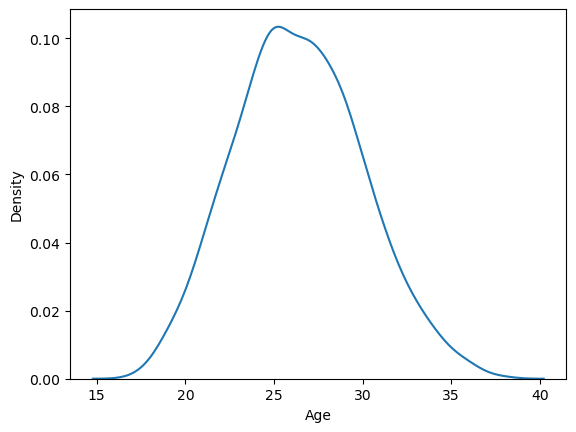

In [13]:
sns.kdeplot(data=eda_df[eda_df['Min']>1000], x='Age')

In [14]:
eda_df['Age Lev'] = eda_df['Age'].apply(lambda age: '<21' if age < 21 else '32<' if age>32 else f'{age}')

In [15]:
eda_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'Age Lev'],
      dtype='object')

In [16]:
eda_df.tail()

,Player Id,Name,Birth Year,Age,Team,Position,year,Weekly Salary,Base Salary,ADJ Salary,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
4745,381101,Alex Mighten,2002,20,Nottingham Forest,Forward,2022,3462.0,180000.0,180000.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,1.00,100.000000,<21
4746,350138,Jamal Lewis,1998,24,Newcastle,Defender,2022,38000.0,1976000.0,1976000.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,7.00,85.714286,24
4747,433972,Maximo Perrone,2003,19,Man City,Midfielder,2022,30000.0,1560000.0,1560000.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,20.00,90.000000,<21
4750,92729,Nathaniel Chalobah,1995,27,Fulham,Midfielder,2022,35000.0,1820000.0,1820000.0,...,0.25,0.0,0.5,0.0,0.5,0.0,0.0,1.25,80.000000,27
4754,75692,Shane Duffy,1992,30,Fulham,Defender,2022,40000.0,2080000.0,2080000.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.00,80.000000,30


In [17]:
static_df = eda_df[eda_df['Min']>1500].groupby(['Position', 'Age Lev']).mean(numeric_only=True)
static_df

Player Id   Birth Year        Age         year  \
Position   Age Lev                                                       
Defender   21       268151.703704  1997.259259  21.000000  2018.259259   
           22       233398.736842  1996.263158  22.000000  2018.263158   
           23       222881.035088  1995.859649  23.000000  2018.859649   
           24       164062.725000  1994.050000  24.000000  2018.050000   
           25       133913.839080  1992.977011  25.000000  2017.977011   
           26        97015.419753  1991.666667  26.000000  2017.666667   
           27        84127.232558  1990.988372  27.000000  2017.988372   
           28        73883.917808  1990.095890  28.000000  2018.095890   
           29        53380.573333  1988.560000  29.000000  2017.560000   
           30        49544.750000  1988.066667  30.000000  2018.066667   
           31        40855.708333  1987.270833  31.000000  2018.270833   
           32        26024.027778  1985.972222  32.000000  2017.972222   
           32<       13133.581395  1982.906977  34.000000  2016.906977   
           <21      284173.354839  1998.516129  19.580645  2018.096774   
Forward    21       214234.625000  1996.791667  21.000000  2017.791667   
           22       198957.153846  1996.192308  22.000000  2018.192308   
           23       164319.281250  1994.781250  23.000000  2017.781250   
           24       156733.289474  1994.526316  24.000000  2018.526316   
           25       117285.446809  1992.617021  25.000000  2017.617021   
           26        86190.121951  1991.878049  26.000000  2017.878049   
           27        66302.025641  1990.589744  27.000000  2017.589744   
           28        61928.970588  1989.882353  28.000000  2017.882353   
           29        53325.555556  1989.194444  29.000000  2018.194444   
           30        54831.863636  1988.727273  30.000000  2018.727273   
           31        38482.941176  1987.764706  31.000000  2018.764706   
           32        49459.000000  1987.000000  32.000000  2019.000000   
           32<       34800.000000  1984.166667  34.000000  2018.166667   
           <21      264023.260870  1998.260870  19.434783  2017.695652   
Goalkeeper 21       348719.000000  1999.000000  21.000000  2020.000000   
           22       236425.571429  1996.000000  22.000000  2018.000000   
           23       176071.666667  1994.666667  23.000000  2017.666667   
           24       143226.545455  1993.727273  24.000000  2017.727273   
           25       130382.400000  1992.900000  25.000000  2017.900000   
           26        96519.909091  1991.363636  26.000000  2017.363636   
           27        70941.590909  1990.409091  27.000000  2017.409091   
           28        78763.954545  1989.681818  28.000000  2017.681818   
           29        75461.857143  1989.476190  29.000000  2018.476190   
           30        41643.933333  1988.000000  30.000000  2018.000000   
           31        26680.461538  1987.076923  31.000000  2018.076923   
           32        20520.100000  1985.700000  32.000000  2017.700000   
           32<       18814.846154  1983.871795  34.358974  2018.230769   
           <21      382724.000000  2001.000000  20.000000  2021.000000   
Midfielder 21       267636.838710  1997.709677  21.000000  2018.709677   
           22       226397.130435  1996.413043  22.000000  2018.413043   
           23       182861.734375  1995.281250  23.000000  2018.281250   
           24       156643.687500  1993.950000  24.000000  2017.950000   
           25       130182.076923  1992.923077  25.000000  2017.923077   
           26        98232.912500  1991.700000  26.000000  2017.700000   
           27        81564.358974  1990.910256  27.000000  2017.910256   
           28        67597.121622  1989.824324  28.000000  2017.824324   
           29        46735.745763  1988.830508  29.000000  2017.830508   
           30        40168.212766  1987.765957  30.000000  2017.765957   
           31        27668.4

In [18]:
cond1 = eda_df['Name']=='Cristiano Ronaldo'
# cond2 = eda_df['year']==2016
player = eda_df[cond1]
player

,Player Id,Name,Birth Year,Age,Team,Position,year,Weekly Salary,Base Salary,ADJ Salary,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
3698,5583,Cristiano Ronaldo,1985,36,Man Utd,Forward,2021,515000.0,26780000.0,26780000.0,...,0.266667,0.066667,0.533333,0.0,0.966667,0.133333,0.0,29.3,81.911263,32<
4559,5583,Cristiano Ronaldo,1985,37,Man Utd,Forward,2022,515000.0,26780000.0,26780000.0,...,0.200000,0.100000,0.700000,0.0,0.800000,0.100000,0.0,15.8,76.582278,32<


In [19]:
player['Position']

3698    Forward
4559    Forward
Name: Position, dtype: object

In [20]:
player['Age Lev']

3698    32<
4559    32<
Name: Age Lev, dtype: object

In [21]:
(player['Position'].values[0], player['Age Lev'].values[0])

('Forward', '32<')

In [22]:
static_df.index

MultiIndex([(  'Defender',  '21'),
            (  'Defender',  '22'),
            (  'Defender',  '23'),
            (  'Defender',  '24'),
            (  'Defender',  '25'),
            (  'Defender',  '26'),
            (  'Defender',  '27'),
            (  'Defender',  '28'),
            (  'Defender',  '29'),
            (  'Defender',  '30'),
            (  'Defender',  '31'),
            (  'Defender',  '32'),
            (  'Defender', '32<'),
            (  'Defender', '<21'),
            (   'Forward',  '21'),
            (   'Forward',  '22'),
            (   'Forward',  '23'),
            (   'Forward',  '24'),
            (   'Forward',  '25'),
            (   'Forward',  '26'),
            (   'Forward',  '27'),
            (   'Forward',  '28'),
            (   'Forward',  '29'),
            (   'Forward',  '30'),
            (   'Forward',  '31'),
            (   'Forward',  '32'),
            (   'Forward', '32<'),
            (   'Forward', '<21'),
            ('Goalke

In [23]:
static_df.loc[(player['Position'].values[0], player['Age Lev'].values[0])]

Player Id        3.480000e+04
Birth Year       1.984167e+03
Age              3.400000e+01
year             2.018167e+03
Weekly Salary    1.204167e+05
Base Salary      6.261667e+06
ADJ Salary       6.634285e+06
Apps             3.216667e+01
Min              2.214000e+03
G                1.075000e+01
NPG              8.583333e+00
A                3.250000e+00
xG               1.027583e+01
NPxG             8.309167e+00
xA               3.149167e+00
xGChain          1.225917e+01
xGBuildup        3.087500e+00
xG90             4.025000e-01
NPxG90           3.333333e-01
xA90             1.333333e-01
xG90+xA90        5.358333e-01
NPxG90+xA90      4.666667e-01
xGChain90        5.008333e-01
xGBuildup90      1.283333e-01
SpG              1.974763e+00
KeyP             8.732218e-01
Drb_Off          4.833688e-01
Fouled           7.249073e-01
Off              8.112167e-01
Disp             8.696129e-01
UnsTch           1.593041e+00
Rating           6.816386e+00
Tackles          3.617142e-01
Inter     

In [24]:
r = pd.DataFrame(data=static_df.loc[(player['Position'].values[0], player['Age Lev'].values[0])]).T
round(r,2)

,,Player Id,Birth Year,Age,year,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
Forward,32<,34800.0,1984.17,34.0,2018.17,120416.67,6261666.67,6634285.17,32.17,2214.0,10.75,...,6.82,0.36,0.13,1.08,0.02,0.67,0.37,0.06,19.52,67.59


In [25]:
player[r.columns]

,Player Id,Birth Year,Age,year,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
3698,5583,1985,36,2021,515000.0,26780000.0,26780000.0,30.0,2468.0,18.0,...,7.110333,0.266667,0.066667,0.533333,0.0,0.966667,0.133333,0.0,29.3,81.911263
4559,5583,1985,37,2022,515000.0,26780000.0,26780000.0,10.0,517.0,1.0,...,6.392000,0.200000,0.100000,0.700000,0.0,0.800000,0.100000,0.0,15.8,76.582278


In [26]:
static2_df = eda_df[eda_df['Min']>1000].groupby(['Position', 'Age Lev', 'year']).mean(numeric_only=True)
y1 = static2_df.loc[('Forward', '32<'), 'Apps']
y1

year
2014    32.000000
2016    30.666667
2017    30.000000
2018    38.000000
2019    25.000000
2020    30.000000
2021    27.500000
2022    26.750000
Name: Apps, dtype: float64

In [27]:
static2_df = eda_df[eda_df['Min']>1000].groupby(['Position', 'Age Lev', 'year']).mean(numeric_only=True)
y2 = static2_df.loc[('Forward', '30'), 'Apps']
y2

year
2014    25.000000
2015    28.000000
2016    27.500000
2017    32.666667
2018    27.200000
2019    32.333333
2020    24.000000
2021    28.833333
2022    32.857143
Name: Apps, dtype: float64

In [28]:
# plt.subplot(3,1,1)
# sns.lineplot(x=range(2014,2022+1), y=y1) # <33
# sns.lineplot(x=range(2014,2022+1), y=y2) # <30
# plt.subplot(3,1,2)
# plt.subplot(3,1,3)

In [29]:
s_eda_df = eda_df.sort_values(by='Base Salary', ascending=False)
s_eda_df[~s_eda_df.duplicated(subset='Name', keep='first')].iloc[:100]['Name'].to_list()

['Gareth Bale',
 'Cristiano Ronaldo',
 'Kevin De Bruyne',
 'Erling Haaland',
 'David de Gea',
 'Alexis Sanchez',
 'Mesut Ozil',
 'Jadon Sancho',
 'Mohamed Salah',
 'Casemiro',
 'Raphael Varane',
 'Raheem Sterling',
 'Romelu Lukaku',
 'Gonzalo Higuain',
 'Jack Grealish',
 'Kalidou Koulibaly',
 'Paul Pogba',
 "N'Golo Kante",
 'Timo Werner',
 'Gabriel Jesus',
 'Anthony Martial',
 'Pierre-Emerick Aubameyang',
 'Joao Cancelo',
 'Kai Havertz',
 'Angel Di Maria',
 'John Stones',
 'Edinson Cavani',
 'Reece James',
 'Bastian Schweinsteiger',
 'Bruno Fernandes',
 'Wayne Rooney',
 'Sergio Aguero',
 'Phil Foden',
 'Eden Hazard',
 'Rodri',
 'Zlatan Ibrahimovic',
 'Virgil van Dijk',
 'David Silva',
 'Robin van Persie',
 'Marcel Sabitzer',
 'Cesc Fabregas',
 'Harry Kane',
 'Marcus Rashford',
 'Thomas Partey',
 'Tanguy Ndombele',
 'Thiago Alcantara',
 'Henrikh Mkhitaryan',
 'Antony',
 'Wesley Fofana',
 'Ben Chilwell',
 'Saul Niguez',
 'Joao Felix',
 'Bukayo Saka',
 'Yaya Toure',
 'Harry Maguire',
 'So

In [30]:
eda_df[eda_df['Name']=='Cristiano Ronaldo'].apply(lambda row: (row['year'], row['Team'], row['Base Salary']), axis=1).to_list()

[(2021, 'Man Utd', 26780000.0), (2022, 'Man Utd', 26780000.0)]

In [31]:
eda_df.groupby(['Position', 'Age Lev', 'year']).mean(numeric_only=True).loc[('Forward', '30'), 'Apps']

year
2014    15.625000
2015    19.666667
2016    20.750000
2017    24.333333
2018    23.333333
2019    25.400000
2020    20.250000
2021    24.857143
2022    28.700000
Name: Apps, dtype: float64

In [32]:
eda_df.head()

,Player Id,Name,Birth Year,Age,Team,Position,year,Weekly Salary,Base Salary,ADJ Salary,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
0,33404,Eden Hazard,1991,23,Chelsea,Forward,2014,185827.0,9663000.0,11640054.0,...,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,58.368421,86.834986,23
1,25244,Alexis Sanchez,1989,25,Arsenal,Forward,2014,140000.0,7280000.0,8769491.0,...,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,42.000000,76.802721,25
2,14260,Sergio Aguero,1988,26,Man City,Forward,2014,160000.0,8320000.0,10022275.0,...,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,25.242424,85.594238,26
3,8040,Cesc Fabregas,1987,27,Chelsea,Midfielder,2014,171481.0,8917000.0,10741422.0,...,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,80.647059,85.193290,27
4,4522,Santi Cazorla,1985,29,Arsenal,Midfielder,2014,90000.0,4680000.0,5637530.0,...,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,64.027027,89.024905,29


In [33]:
age_order = ['<21', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '32<']
eda_df['Age Lev'] = pd.Categorical(eda_df['Age Lev'], categories=age_order, ordered=True)

In [34]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4754
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Player Id      4588 non-null   int64   
 1   Name           4588 non-null   object  
 2   Birth Year     4588 non-null   int64   
 3   Age            4588 non-null   int64   
 4   Team           4588 non-null   object  
 5   Position       4588 non-null   object  
 6   year           4588 non-null   int64   
 7   Weekly Salary  4588 non-null   float64 
 8   Base Salary    4588 non-null   float64 
 9   ADJ Salary     4588 non-null   float64 
 10  Apps           4588 non-null   float64 
 11  Min            4588 non-null   float64 
 12  G              4588 non-null   float64 
 13  NPG            4588 non-null   float64 
 14  A              4588 non-null   float64 
 15  xG             4588 non-null   float64 
 16  NPxG           4588 non-null   float64 
 17  xA             4588 non-null   fl

In [35]:
eda_df.groupby(['Position', 'Age Lev']).mean(numeric_only=True).loc['Forward']

,Player Id,Birth Year,Age,year,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
Age Lev,,,,,,,,,,,,,,,,,,,,,
<21,303877.496503,1999.097902,18.881119,2017.979021,24603.741259,1.279394e+06,1.399043e+06,13.958042,654.874126,1.804196,...,6.392343,0.529411,0.196584,0.525784,0.004794,0.206427,0.337975,0.033593,10.699055,74.852615
21,245968.000000,1997.089286,21.000000,2018.089286,52073.142857,2.707804e+06,2.961762e+06,22.589286,1307.482143,4.214286,...,6.572149,0.582858,0.274198,0.600074,0.007206,0.332081,0.470652,0.034291,15.798359,73.317294
22,211719.556962,1996.088608,22.000000,2018.088608,54921.367089,2.855911e+06,3.079328e+06,20.151899,1135.253165,4.303797,...,6.557411,0.603678,0.258404,0.635625,0.003944,0.313356,0.453238,0.035439,14.337803,73.902100
23,180007.740260,1994.987013,23.000000,2017.987013,60094.558442,3.124917e+06,3.436752e+06,22.259740,1363.636364,5.233766,...,6.657855,0.663491,0.287833,0.795438,0.008938,0.334824,0.498418,0.045739,15.987850,73.787866
24,140174.035714,1993.845238,24.000000,2017.845238,64899.726190,3.374786e+06,3.726915e+06,23.440476,1518.297619,5.511905,...,6.698128,0.664512,0.300388,0.785360,0.009719,0.386263,0.535371,0.051441,17.341840,74.628010
25,131949.912621,1992.980583,25.000000,2017.980583,68065.533981,3.539408e+06,3.883778e+06,22.873786,1452.446602,5.378641,...,6.666182,0.686901,0.345168,0.826541,0.008573,0.417779,0.517322,0.049944,16.952998,73.380213
26,96308.129032,1991.559140,26.000000,2017.559140,65752.279570,3.419118e+06,3.800687e+06,23.634409,1524.462366,5.838710,...,6.692632,0.698714,0.294073,0.828720,0.010890,0.456903,0.530893,0.067811,17.668021,73.869583
27,63832.175824,1990.043956,27.000000,2017.043956,63228.659341,3.287890e+06,3.684228e+06,22.098901,1390.450549,5.626374,...,6.641115,0.572400,0.266172,0.779772,0.008292,0.419184,0.458249,0.050096,16.881974,73.924348
28,63450.961538,1989.705128,28.000000,2017.705128,75021.679487,3.901128e+06,4.345078e+06,23.141026,1466.692308,5.858974,...,6.670146,0.624095,0.261187,0.809550,0.008463,0.507822,0.444810,0.059044,17.451838,71.814828


In [36]:
eda_df.head()

,Player Id,Name,Birth Year,Age,Team,Position,year,Weekly Salary,Base Salary,ADJ Salary,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
0,33404,Eden Hazard,1991,23,Chelsea,Forward,2014,185827.0,9663000.0,11640054.0,...,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,58.368421,86.834986,23
1,25244,Alexis Sanchez,1989,25,Arsenal,Forward,2014,140000.0,7280000.0,8769491.0,...,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,42.000000,76.802721,25
2,14260,Sergio Aguero,1988,26,Man City,Forward,2014,160000.0,8320000.0,10022275.0,...,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,25.242424,85.594238,26
3,8040,Cesc Fabregas,1987,27,Chelsea,Midfielder,2014,171481.0,8917000.0,10741422.0,...,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,80.647059,85.193290,27
4,4522,Santi Cazorla,1985,29,Arsenal,Midfielder,2014,90000.0,4680000.0,5637530.0,...,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,64.027027,89.024905,29


In [37]:
eda_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'Age Lev'],
      dtype='object')

In [38]:
player_indexes = eda_df[eda_df['Name']=='Son Heung-Min'].index
list(player_indexes)

[898, 1142, 1695, 2164, 2646, 3152, 3667, 4265]

In [39]:
featuring_df = eda_df[eda_df.Min>1000].copy()
featured_df = featuring_df.copy()
featured_df.Position = pd.factorize(featuring_df.Position)[0]
featured_df = featured_df.drop(
            [
                'Player Id', 'Name', 'Team', 'Birth Year', 'year',
                'Weekly Salary', 'Base Salary', 'ADJ Salary',
                'Age', 'Age Lev', 'Apps',
                'xG90', 'NPxG90', 'xA90', 'xGChain90', 'xGBuildup90',
                'xG90+xA90', 'NPxG90+xA90'
            ],
            axis=1
        )
featured_df.head()

,Position,Min,G,NPG,A,xG,NPxG,xA,xGChain,xGBuildup,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
0,0,3389.0,14.0,11.0,9.0,12.02,8.97,11.24,31.84,19.48,...,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,58.368421,86.834986
1,0,2967.0,16.0,16.0,8.0,13.45,12.69,8.49,27.16,10.74,...,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,42.000000,76.802721
2,0,2551.0,26.0,21.0,8.0,25.27,20.70,5.57,27.81,6.88,...,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,25.242424,85.594238
3,1,2895.0,3.0,3.0,18.0,3.25,3.25,10.15,23.01,16.97,...,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,80.647059,85.193290
4,1,2999.0,7.0,1.0,11.0,10.59,6.02,9.76,24.66,16.91,...,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,64.027027,89.024905


In [40]:
player_name = 'Son Heung-Min'
player_indexes = featuring_df[featuring_df['Name']==player_name].index
featuring_df.loc[player_indexes]

,Player Id,Name,Birth Year,Age,Team,Position,year,Weekly Salary,Base Salary,ADJ Salary,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%,Age Lev
898,91909,Son Heung-Min,1992,23,Tottenham,Forward,2015,85000.0,4420000.0,5271178.0,...,0.964286,0.428571,0.428571,0.0,0.250000,0.678571,0.035714,15.964286,79.642058,23
1142,91909,Son Heung-Min,1992,24,Tottenham,Forward,2016,85000.0,4420000.0,5139717.0,...,0.558824,0.235294,0.264706,0.0,0.176471,0.588235,0.029412,22.823529,81.185567,24
1695,91909,Son Heung-Min,1992,25,Tottenham,Forward,2017,85000.0,4420000.0,5024513.0,...,0.459459,0.270270,0.405405,0.0,0.243243,0.702703,0.000000,24.756757,85.152838,25
2164,91909,Son Heung-Min,1992,26,Tottenham,Forward,2018,85000.0,4420000.0,4938673.0,...,0.741935,0.258065,0.387097,0.0,0.129032,0.774194,0.064516,24.258065,85.638298,26
2646,91909,Son Heung-Min,1992,27,Tottenham,Forward,2019,140000.0,7280000.0,8054587.0,...,0.766667,0.633333,0.566667,0.0,0.566667,1.600000,0.000000,26.566667,84.692597,27
3152,91909,Son Heung-Min,1992,28,Tottenham,Forward,2020,140000.0,7280000.0,7856725.0,...,0.864865,0.378378,0.378378,0.0,0.081081,1.459459,0.081081,28.567568,83.443709,28
3667,91909,Son Heung-Min,1992,29,Tottenham,Forward,2021,190000.0,9880000.0,9880000.0,...,0.428571,0.371429,0.400000,0.0,0.228571,0.514286,0.171429,29.000000,86.600985,29
4265,91909,Son Heung-Min,1992,30,Tottenham,Forward,2022,190000.0,9880000.0,9880000.0,...,0.666667,0.361111,0.361111,0.0,0.111111,0.583333,0.055556,21.805556,82.038217,30


In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scalered_data = scaler.fit_transform(featured_df)
scalered_df = pd.DataFrame(scalered_data, index=featured_df.index, columns=featured_df.columns)
scalered_df.head()

,Position,Min,G,NPG,A,xG,NPxG,xA,xGChain,xGBuildup,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
0,-1.0,1.083846,3.25,2.50,2.666667,3.286724,2.527919,3.888446,3.708997,3.813268,...,3.184956,-0.500926,-0.279381,-0.876477,-0.146883,-0.422861,-0.077473,-0.435176,1.307526,0.702786
1,-1.0,0.725536,3.75,3.75,2.333333,3.736057,3.786802,2.792829,3.015920,1.665848,...,2.789225,0.625815,0.302054,0.848437,-0.146883,-0.454499,1.546205,-0.512099,0.487102,-0.251182
2,-1.0,0.372320,6.25,5.00,2.333333,7.450118,6.497462,1.629482,3.112181,0.717445,...,2.411501,-0.564972,-0.460940,-0.455644,-0.146883,-0.508101,-0.233524,-0.512099,-0.352828,0.584803
3,0.0,0.664402,0.50,0.50,5.666667,0.531029,0.592217,3.454183,2.401333,3.196560,...,2.267869,1.188741,-0.183676,0.161680,-0.146883,-0.110644,2.541597,-0.082235,2.424185,0.546677
4,0.0,0.752706,1.50,0.00,3.333333,2.837392,1.529611,3.298805,2.645687,3.181818,...,2.216175,0.281899,0.213391,-0.464649,-0.146883,-0.223681,1.401781,-0.117089,1.591149,0.911025


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
player_name = 'Son Heung-Min'
player_indexes = featuring_df[featuring_df['Name']==player_name].index
similarity = cosine_similarity(scalered_df.loc[list(player_indexes)], scalered_df)
similarity.T

array([[0.25057017, 0.67148005, 0.71290327, ..., 0.78546191, 0.77151255,
        0.73145582],
       [0.41961204, 0.79853719, 0.81768954, ..., 0.8831722 , 0.87527639,
        0.83804508],
       [0.67077459, 0.93321374, 0.95655925, ..., 0.87637023, 0.94138307,
        0.93128011],
       ...,
       [0.72607572, 0.56556047, 0.60477505, ..., 0.49089527, 0.5559761 ,
        0.58985576],
       [0.69805163, 0.43350504, 0.41025535, ..., 0.14456382, 0.15582167,
        0.36209084],
       [0.54745269, 0.19539523, 0.22899156, ..., 0.05826672, 0.16949483,
        0.24656676]])

In [44]:
featuring_df['similarity'] = similarity.sum(axis=0)
featuring_df['similarity-rank'] = featuring_df['similarity'].rank(ascending=False)
featuring_df = featuring_df[featuring_df['Name']!=player_name].sort_values('similarity-rank')
featuring_df[~featuring_df.duplicated(['Name'], keep='first')].iloc[:3, 1:7]

,Name,Birth Year,Age,Team,Position,year
1666,Alexandre Lacazette,1991,26,Arsenal,Forward,2017
1606,Sergio Aguero,1988,29,Man City,Forward,2017
2122,Mohamed Salah,1992,26,Liverpool,Forward,2018


<Axes: xlabel='xGBuildup', ylabel='Density'>

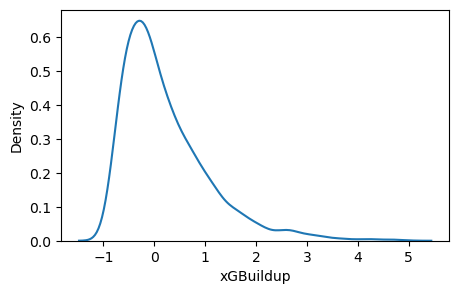

In [45]:
plt.figure(figsize=(5,3))
sns.kdeplot(scalered_df, x='xGBuildup')

<Axes: xlabel='xGBuildup', ylabel='Density'>

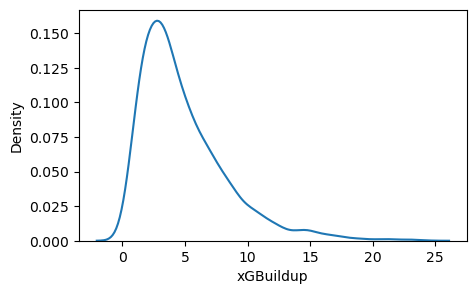

In [46]:
plt.figure(figsize=(5,3))
sns.kdeplot(eda_df[eda_df['Min']>1000], x='xGBuildup')

In [47]:
featuring_df = eda_df[eda_df.Min>1000].copy()
featured_df = featuring_df.copy()
featured_df.Position = pd.factorize(featuring_df.Position)[0]
featured_df = featured_df.drop(
            [
                'Player Id', 'Name', 'Team', 'Birth Year', 'year',
                'Weekly Salary', 'Base Salary', 'ADJ Salary',
                'Age', 'Age Lev', 'Apps',
                'xG90', 'NPxG90', 'xA90', 'xGChain90', 'xGBuildup90',
                'xG90+xA90', 'NPxG90+xA90'
            ],
            axis=1
        )

In [48]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scalered_data = scaler.fit_transform(featured_df)
scalered_df = pd.DataFrame(scalered_data, index=featured_df.index, columns=featured_df.columns)
scalered_df.head()

,Position,Min,G,NPG,A,xG,NPxG,xA,xGChain,xGBuildup,...,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
0,-1.0,1.083846,3.25,2.50,2.666667,3.286724,2.527919,3.888446,3.708997,3.813268,...,3.184956,-0.500926,-0.279381,-0.876477,-0.146883,-0.422861,-0.077473,-0.435176,1.307526,0.702786
1,-1.0,0.725536,3.75,3.75,2.333333,3.736057,3.786802,2.792829,3.015920,1.665848,...,2.789225,0.625815,0.302054,0.848437,-0.146883,-0.454499,1.546205,-0.512099,0.487102,-0.251182
2,-1.0,0.372320,6.25,5.00,2.333333,7.450118,6.497462,1.629482,3.112181,0.717445,...,2.411501,-0.564972,-0.460940,-0.455644,-0.146883,-0.508101,-0.233524,-0.512099,-0.352828,0.584803
3,0.0,0.664402,0.50,0.50,5.666667,0.531029,0.592217,3.454183,2.401333,3.196560,...,2.267869,1.188741,-0.183676,0.161680,-0.146883,-0.110644,2.541597,-0.082235,2.424185,0.546677
4,0.0,0.752706,1.50,0.00,3.333333,2.837392,1.529611,3.298805,2.645687,3.181818,...,2.216175,0.281899,0.213391,-0.464649,-0.146883,-0.223681,1.401781,-0.117089,1.591149,0.911025


In [49]:
from sklearn.metrics.pairwise import euclidean_distances

In [50]:
player_name = 'Son Heung-Min'
player_indexes = featuring_df[featuring_df['Name']==player_name].index
similarity = euclidean_distances(scalered_df.loc[list(player_indexes)], scalered_df)
similarity.T

array([[12.39001479,  9.50850356,  8.98954619, ...,  7.92835215,
         8.63509021,  8.97482031],
       [10.84830811,  7.30916511,  6.91374873, ...,  5.61697233,
         6.20589718,  6.99699418],
       [13.92730139,  9.16586136,  8.25778546, ...,  8.90858835,
         5.90717249,  9.66990054],
       ...,
       [ 2.5003348 ,  6.61246083,  7.11040712, ...,  8.55384672,
        11.31540855,  5.9649152 ],
       [ 3.82013008,  7.33830228,  8.00991433, ..., 10.32292225,
        13.03381187,  7.27899621],
       [ 3.42663292,  7.99399091,  8.49746122, ..., 10.11364554,
        12.65795197,  7.27062282]])

In [51]:
featuring_df['similarity'] = similarity.sum(axis=0)
featuring_df['similarity-rank'] = featuring_df['similarity'].rank(ascending=True)
featuring_df = featuring_df[featuring_df['Name']!=player_name].sort_values('similarity-rank')
featuring_df[~featuring_df.duplicated(['Name'], keep='first')].iloc[:3, 1:7]

,Name,Birth Year,Age,Team,Position,year
3678,Phil Foden,2000,21,Man City,Midfielder,2021
2212,Marcus Rashford,1998,20,Man Utd,Forward,2018
1666,Alexandre Lacazette,1991,26,Arsenal,Forward,2017


In [52]:
similarity[0]

array([12.39001479, 10.84830811, 13.92730139, ...,  2.5003348 ,
        3.82013008,  3.42663292])

In [53]:
similarity.sum(axis=0)

array([74.19800857, 57.12601861, 73.93192276, ..., 56.04696365,
       65.64749056, 66.98807427])

In [57]:
eda_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'Age Lev'],
      dtype='object')

In [55]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4754
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Player Id      4588 non-null   int64   
 1   Name           4588 non-null   object  
 2   Birth Year     4588 non-null   int64   
 3   Age            4588 non-null   int64   
 4   Team           4588 non-null   object  
 5   Position       4588 non-null   object  
 6   year           4588 non-null   int64   
 7   Weekly Salary  4588 non-null   float64 
 8   Base Salary    4588 non-null   float64 
 9   ADJ Salary     4588 non-null   float64 
 10  Apps           4588 non-null   float64 
 11  Min            4588 non-null   float64 
 12  G              4588 non-null   float64 
 13  NPG            4588 non-null   float64 
 14  A              4588 non-null   float64 
 15  xG             4588 non-null   float64 
 16  NPxG           4588 non-null   float64 
 17  xA             4588 non-null   fl

In [63]:
(~eda_df.duplicated(['Name'], keep='first')).sum()

1641

In [64]:
(~eda_df.duplicated(['Team'], keep='first')).sum()

33

In [67]:
list(eda_df[(~eda_df.duplicated(['Team'], keep='first'))]['Team'])

['Chelsea',
 'Arsenal',
 'Man City',
 'Crystal Palace',
 'Man Utd',
 'Southampton',
 'Stoke',
 'Leicester',
 'West Ham',
 'Tottenham',
 'WBA',
 'Newcastle',
 'Liverpool',
 'Hull',
 'QPR',
 'Everton',
 'Burnley',
 'Swansea',
 'Sunderland',
 'Aston Villa',
 'Watford',
 'Norwich',
 'Bournemouth',
 'Middlesbrough',
 'Brighton',
 'Huddersfield',
 'Wolves',
 'Cardiff',
 'Fulham',
 'Sheff Utd',
 'Leeds',
 'Brentford',
 'Nottingham Forest']